In [47]:
import pandas as pd
import numpy as np

In [48]:
data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv",index_col = 0)

In [49]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [50]:
iris_feature_names = ['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']
iris_features = np.array(data[iris_feature_names])
#iris_features.info()

In [51]:
from sklearn import preprocessing

In [52]:
le = preprocessing.LabelEncoder()
le.fit(data.Species)
iris_target_names = list(le.classes_)
print(iris_target_names)
iris_target = np.array(le.transform(data.Species))

['setosa', 'versicolor', 'virginica']


In [53]:
print(type(iris_features))
print(type(iris_target))


<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [54]:
print(iris_features.shape)
print(iris_target.shape)


(150, 4)
(150,)


In [55]:
#This meets all of the requirements or sci-kit learn

X = iris_features
y = iris_target

In [57]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


Step 1: Import the class

In [58]:
from sklearn.neighbors import KNeighborsClassifier

Step 2: Instantiate the estimator

In [60]:
knn = KNeighborsClassifier(n_neighbors = 1)
print(knn)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [61]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([2, 1])

Use a different value for K

In [62]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X,y)
knn.predict(X_new)

array([1, 1])

Now, let us use a different classification model (logistic)

In [64]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
logreg.predict(X_new)
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
y_pred = logreg.predict(X)
len(y_pred)

150

In [69]:
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.96


KNN (K = 5)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.966666666667


Now, split the data into train and test

In [71]:
#Split X and y into test and train
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 4)

In [72]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


In [73]:
#Step 2 Train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
#Step 3 make predictions on the test set
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.933333333333


In [76]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.966666666667


In [78]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

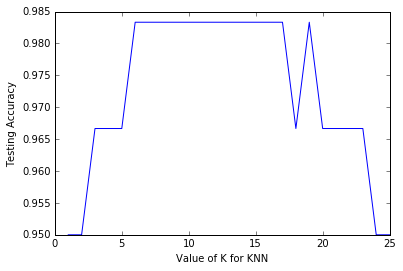

In [80]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [81]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=11)

# train the model with X and y (not X_train and y_train)
knn.fit(X, y)

# make a prediction for an out-of-sample observation
knn.predict([[3, 5, 4, 2]])

array([1])